# STA 141B WQ 25 Homework Assignment 2

## Instructions

- Complete the exercises below. Create more code chunks if necessary. Answer all questions. Show results for both the *test* and *run* cases.
- Export the Jupyter Notebook as an PDF file.
- Submit the PDF by **Sunday, February 9, at 11:59 PM PT** to Gradescope.
- For each exercise, indicate the region of your answer in the PDF to facilitate grading. 

## Additional information

- Complete this worksheet yourself. 
- You may use the internet or discuss possible approaches to solve the problems with other students. You are not allowed to share your code or your answers with other students.
- No other libraries than those explicitly allowed can be used. 
- Use code cells for your Python scripts and Markdown cells for explanatory text or answers to non-coding questions. Answer all textual questions in complete sentences.
- Late homework submissions will not be accepted. No submissions will be accepted by email.
- The total number of points for this assignment is 20.

__Exercise 1__

In this assignment, you'll use SQL queries to explore data in Lahman's Baseball Database, which contains "complete batting and pitching statistics from 1871 to 2020, plus fielding statistics, standings, team stats, managerial records, post-season data, and more."

We use the 2019 version for this homework. You can find the database in SQLite format on Piazza.

Documentation for the database, including a description of all tables, is in the `readme2019.txt` file. 

__(a)__ From 1990 to 1999, which team had the highest payroll? Payroll means the sum of the salaries for all people on the team in a given year. Return a `pandas.DataFrame` with column names `year`, `payroll` and `team`, which is the team name. 

__Test:__

```
    year	payroll		team
	2000	92338260.0	 New York Yankees
	2001	112287143.0	New York Yankees
	2002	125928583.0	New York Yankees
	2003	152749814.0	New York Yankees
```

In [46]:
import sqlite3
import pandas as pd

query = '''
WITH Payrolls AS (
    SELECT 
        s.yearID AS year, 
        SUM(s.salary) AS payroll, 
        t.name AS team
    FROM Salaries s
    JOIN Teams t ON s.teamID = t.teamID AND s.yearID = t.yearID
    WHERE s.yearID BETWEEN 1990 AND 1999
    GROUP BY s.yearID, t.name
),
Ranked AS (
    SELECT *, 
           RANK() OVER (PARTITION BY year ORDER BY payroll DESC) AS rnk
    FROM Payrolls
)
SELECT year, payroll, team 
FROM Ranked
WHERE rnk = 1
ORDER BY year;
'''

In [47]:
db_path = "lahmansbaseballdb.sqlite"
conn = sqlite3.connect(db_path)

df = pd.read_sql_query(query, conn)
conn.close()

In [48]:
df

,year,payroll,team
0,1990,23361084.0,Kansas City Royals
1,1991,36999167.0,Oakland Athletics
2,1992,44788666.0,Toronto Blue Jays
3,1993,47279166.0,Toronto Blue Jays
4,1994,49383513.0,Atlanta Braves
5,1995,50590000.0,Toronto Blue Jays
6,1996,54490315.0,Baltimore Orioles
7,1997,62241545.0,New York Yankees
8,1998,72355634.0,Baltimore Orioles
9,1999,86734359.0,New York Yankees


__(b, i)__ For each year between 1990 and 1999, identify the player with the highest salary. 

__Test:__ 

```
	 year    name		 salary
 	2000	Brown		15714286.0
 	2001	Rodriguez	22000000.0
 	2002	Rodriguez	22000000.0
 	2003	Rodriguez	22000000.0
 	2004	Ramirez	  22500000.0
```

In [50]:
query = '''
WITH SalariesRanked AS (
    SELECT 
        s.yearID AS year, 
        p.nameLast AS name, 
        s.salary AS salary, 
        RANK() OVER (PARTITION BY s.yearID ORDER BY s.salary DESC) AS rnk
    FROM Salaries s
    JOIN People p ON s.playerID = p.playerID
    WHERE s.yearID BETWEEN 1990 AND 1999
)
SELECT year, name, salary
FROM SalariesRanked
WHERE rnk = 1
ORDER BY year;
'''

In [ ]:
db_path = "lahmansbaseballdb.sqlite"
conn = sqlite3.connect(db_path)

df = pd.read_sql_query(query, conn)
conn.close()

df

,year,name,salary
0,1990,Yount,3200000.0
1,1991,Strawberry,3800000.0
2,1992,Bonilla,6100000.0
3,1993,Bonilla,6200000.0
4,1994,Bonilla,6300000.0
5,1995,Fielder,9237500.0
6,1996,Fielder,9237500.0
7,1997,Belle,10000000.0
8,1998,Sheffield,14936667.0
9,1999,Belle,11949794.0


__(b, ii)__ For these players, obtain their log-salary over their entire career. _Print the length of the data set of their career log-salaries_. 

__Test:__ For example, the career salary for for Kevin Brown, the player with the largest salary in 2000, is given by: 

```
	year	name	 salary
	1989	Brown	72500.0
	1990	Brown	218000.0
	1991	Brown	355000.0
	1992	Brown	1200000.0
	1993	Brown	2800000.0
	1994	Brown	4225000.0
	1995	Brown	4225000.0
	1996	Brown	3350000.0
	1997	Brown	4510000.0
	1998	Brown	4935000.0
	1999	Brown	10714286.0
	2000	Brown	15714286.0
	2001	Brown	15714286.0
	2002	Brown	15714286.0
	2003	Brown	15714286.0
	2004	Brown	15714286.0
	2005	Brown	15714286.0
```

The length of the data frame returned for the career salaries of the best-paid players in 2000-2004 is given as 

```
> data = pd.read_sql("...")
> data.shape[0]
58
```

In [52]:
query = '''
WITH TopPaidPlayers AS (
    -- Get highest paid player per year from 1990-1999
    SELECT 
        s.yearID AS year, 
        p.playerID, 
        p.nameLast AS name, 
        s.salary AS salary,
        RANK() OVER (PARTITION BY s.yearID ORDER BY s.salary DESC) AS rnk
    FROM Salaries s
    JOIN People p ON s.playerID = p.playerID
    WHERE s.yearID BETWEEN 1990 AND 1999
),
UniqueTopPlayers AS (
    -- Select only the top-paid player per year
    SELECT DISTINCT playerID, name FROM TopPaidPlayers WHERE rnk = 1
)
-- Get entire career salary history for these players
SELECT s.yearID AS year, 
       p.nameLast AS name, 
       s.salary AS salary
FROM Salaries s
JOIN People p ON s.playerID = p.playerID
JOIN UniqueTopPlayers u ON s.playerID = u.playerID
ORDER BY p.nameLast, s.yearID;
'''

In [90]:
db_path = "lahmansbaseballdb.sqlite"
conn = sqlite3.connect(db_path)

df = pd.read_sql_query(query, conn)
conn.close()

df = df.groupby(['year', 'name'], as_index=False).mean()
df

,year,name,salary
0,1985,Strawberry,516667.0
1,1985,Yount,1000000.0
2,1986,Bonilla,115000.0
3,1986,Strawberry,945000.0
4,1986,Yount,950000.0
...,...,...,...
81,2005,Sheffield,13000000.0
82,2006,Sheffield,10756171.0
83,2007,Sheffield,10916071.0
84,2008,Sheffield,13326306.0


__(b, iii)__ Plot the career salaries over time, colored by player. Add a scatter point for the year each player had the largest salary. 

__Test:__
<img src="./source/test.png" alt="drawing" width="500"/>

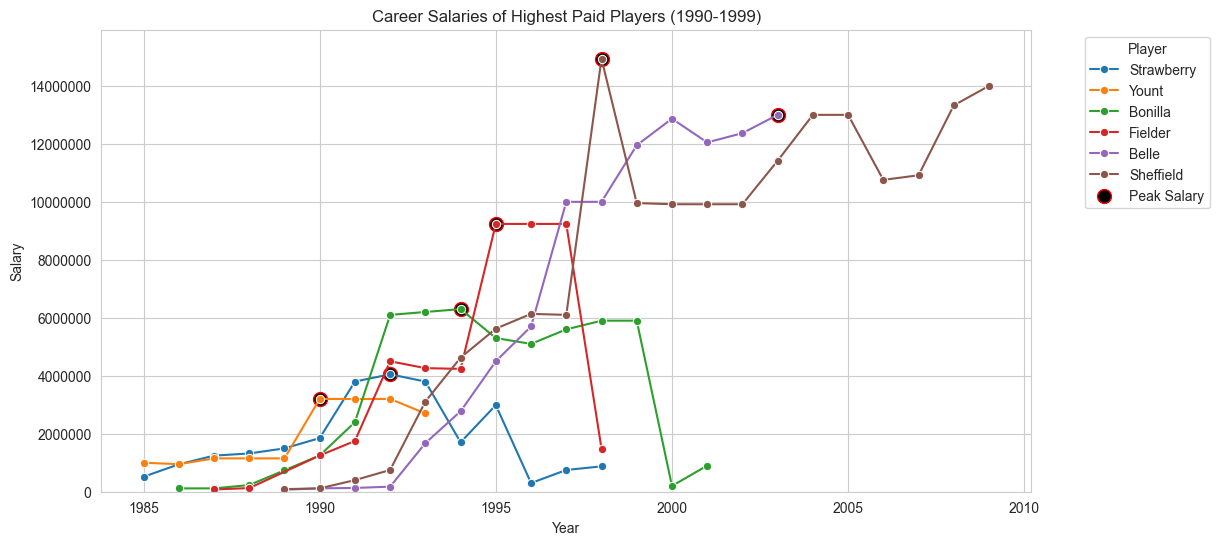

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the year each player had their highest salary
peak_salaries = df.loc[df.groupby("name")["salary"].idxmax()]

# Set up the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Line plot of salaries over time, colored by player
sns.lineplot(data=df, x="year", y="salary", hue="name", marker="o", palette="tab10")

# Scatter plot for peak salary points
plt.scatter(peak_salaries["year"], peak_salaries["salary"], color="black", edgecolors="red", s=100, label="Peak Salary")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Salary")
plt.title("Career Salaries of Highest Paid Players (1990-1999)")
plt.legend(title="Player", bbox_to_anchor=(1.05, 1), loc="upper left")

# Set y-axis limits from 0 to the highest salary
plt.ylim(0, df["salary"].max() + 1000000)

# Disable scientific notation on y-axis
plt.ticklabel_format(style="plain", axis="y")

# Show the plot
plt.show()


__Exercise 2__

We will use the [lichess](https://lichess.org/api) API to retrieve some information about the current state of chess in the world. In order to answer below questions, make precise and economical requests. You may use:

```
import requests
import json import loads
import pandas

from datetime import datetime
```

__(a)__ What is the real name of the player `muisback`? 

In [2]:
import requests
import json
from datetime import datetime

In [3]:
website = 'https://lichess.org'

username = 'muisback'
apiPath = f'/api/user/{username}'

url = f"{website}{apiPath}"
response = requests.get(url)
res_json = response.json()

In [4]:
'Real Name: ' + res_json['profile']['realName']

'Real Name: Rauf Mamedov'

In [5]:
res_json['createdAt']

1580238632291

In [6]:
f'Created At: {datetime.fromtimestamp(res_json['createdAt'] / 1000)}'

'Created At: 2020-01-28 11:10:32.291000'

__(b, i)__ Get the username of the last player that played a rapid game against user `athena-pallada` in 2023. __(ii)__ In all games against this user, what is the win-to-loss ratio of `athena-pallada`?

*Hints: For (i), use [this](https://www.epochconverter.com/) to obtain your epoch time. Bor both (i) and (ii): What kind of data type to you accept in your header? For (iii): Why can't the JSON be converted to a dict? Inspect the string to find the cause of the error. Use string methods to fix the problem.*

In [7]:
# i
website = 'https://lichess.org'
username = 'athena-pallada'
apiPath = f'/api/games/user/{username}'

queryParams = {
  'perfType': 'rapid',
  'since': int(datetime(2023, 1, 1).timestamp() * 1000),
  'until': int(datetime(2024, 1, 1).timestamp() * 1000),
  'sort': 'dateDesc',
  'max': 1,
}

headers = {
  "Accept": "application/x-ndjson"
}

url = f'{website}{apiPath}?{'&'.join(f'{key}={value}' for key, value in queryParams.items())}'

response = requests.get(url, headers=headers)
response.status_code

200

In [8]:
res_json = response.json()

In [9]:
players = res_json['players']

In [10]:
print(json.dumps(players, indent=2)) # the last player that played against athena-pallada is debilych

{
  "white": {
    "user": {
      "name": "athena-pallada",
      "title": "GM",
      "flair": "nature.fire",
      "id": "athena-pallada"
    },
    "rating": 2837
  },
  "black": {
    "user": {
      "name": "Debilych",
      "flair": "activity.performing-arts",
      "id": "debilych"
    },
    "rating": 1500,
    "provisional": true
  }
}


In [7]:
# ii
website = 'https://lichess.org'
username = 'athena-pallada'
apiPath = f'/api/games/user/{username}'

queryParams = {
  'vs': 'debilych',
}

url = f'{website}{apiPath}?{'&'.join(f'{key}={value}' for key, value in queryParams.items())}'

headers = {
  "Accept": "application/x-ndjson"
}

response = requests.get(url, headers=headers)
response.status_code

200

In [8]:
res_json = [json.loads(json_str) for json_str in response.text.strip().split('\n')]

In [86]:
# res_json

In [10]:
def did_win(player_id, game):
  is_white = game['players']['white']['user']['id'] == player_id
  winner_is_white = game['winner'] == 'white'
  return is_white and winner_is_white or not is_white and not winner_is_white

did_win_games = [did_win(username, game) for game in res_json]

In [12]:
did_win_games

[True, False]

In [13]:
f'win-to-loss ratio is {sum(did_win_games)}:{sum([not win for win in did_win_games])}'

'win-to-loss ratio is 1:1'

__(c)__ I want to learn about the [December Arena Tournament](https://lichess.org/tournament/dec24lta). __(i)__ How many games have been played in total? __(ii)__ How many games have been played by the winner? __(iii)__ How many players played in the tournament? __(iv)__ Which players played exactly 22 games?

In [14]:
# i
website = 'https://lichess.org'
tournament_id = 'dec24lta'
apiPath = f'/api/tournament/{tournament_id}'

url = f'{website}{apiPath}'

response = requests.get(url)
response.status_code

200

In [18]:
tournament_info = response.json()

In [85]:
# print(json.dumps(tournament_info, indent=2))

In [21]:
website = 'https://lichess.org'
tournament_id = 'dec24lta'
apiPath = f'/api/tournament/{tournament_id}/games'

url = f'{website}{apiPath}'

response = requests.get(url)
response.status_code

200

In [84]:
# print(response.text)

In [23]:
num_games = sum(1 for line in response.text.split('\n') if line.startswith('[Event "'))

In [25]:
f'The total number of games in the tournament is {num_games}'

'The total number of games in the tournament is 5489'

In [30]:
# ii
first_place = tournament_info['podium'][0]
first_place

{'name': 'penguingim1',
 'title': 'GM',
 'flair': 'nature.penguin',
 'patron': True,
 'rank': 1,
 'rating': 3342,
 'score': 176,
 'nb': {'game': 64, 'berserk': 12, 'win': 50},
 'performance': 3362}

In [31]:
f'The winner {first_place['name']} played {first_place['nb']['game']} games'

'The winner penguingim1 played 64 games'

In [32]:
# iii
f'{tournament_info['nbPlayers']} players played in this tournament'

'400 players played in this tournament'

In [33]:
# iv
games = {}

for line in response.text.split('\n'):
  if line.startswith('[White "') or line.startswith('[Black "'):
    username = line.split('"')[1]
    games[username] = games.get(username, 0) + 1

In [83]:
# games

In [37]:
players_with_22_games = [player for player, games in games.items() if games == 22]

In [38]:
f'These players played exactly 22 games: {players_with_22_games}'

"These players played exactly 22 games: ['Bardyk01', 'LEGENYA19989898', 'emirislamking']"

__(d, i)__ Obtain all rated and analyzed ultrabullet games that player `nihalsarin2004` played in December 2024. How many games do you find? __(ii)__ From each game, extract the information whether `nihalsarin2004` played black or white, which color won, whether he played against a player with a higher rating or not and what opening was played (ignore variations). What proportion of games did `nihalsarin2004` win? What proportion of games did he win as white? What percentage of opponents were stronger than `nihalsarin2004`? 

In [73]:
# i
website = 'https://lichess.org'
username = 'nihalsarin2004'
apiPath = f'/api/games/user/{username}'

queryParams = {
  'since': int(datetime(2024, 12, 1).timestamp() * 1000),
  'until': int(datetime(2025, 1, 1).timestamp() * 1000),
  'perfType': 'ultraBullet',
  'rated': 'true',
  'analysed': 'true',
  'opening': 'true',
}


url = f'{website}{apiPath}?{'&'.join(f'{key}={value}' for key, value in queryParams.items())}'

headers = {
  "Accept": "application/x-ndjson"
}

response = requests.get(url, headers=headers)
response.status_code

200

In [82]:
# print(response.text)

In [75]:
games = [json.loads(game) for game in response.text.strip().split('\n')]

In [81]:
# games

In [77]:
f'I found {len(games)} games'

'I found 77 games'

In [88]:
def did_win(player_id, game: dict):
  if not 'winner' in game: return False
  is_white = game['players']['white']['user']['id'] == player_id
  winner_is_white = game.get('winner', '') == 'white'
  return is_white and winner_is_white or not is_white and not winner_is_white

num_games_won = sum(1 for game in games if did_win(username, game))
f'Proportion of games won is {num_games_won / len(games)}'

'Proportion of games won is 0.5454545454545454'

In [79]:
def did_win_as_white(player_id, game):
  is_white = game['players']['white']['user']['id'] == player_id
  winner_is_white = game.get('winner', '') == 'white'
  return is_white and winner_is_white

num_games_won_as_white = sum(1 for game in games if did_win_as_white(username, game))
num_games_as_white = sum(1 for game in games if game['players']['white']['user']['id'] == username)
f'Proportion of games won as white is {num_games_won_as_white / num_games_as_white}'

'Proportion of games won as white is 0.5909090909090909'

In [80]:
# your rating - opponent's rating
def get_rating_diff(player_id, game):
  players = game['players']
  white_player = players['white']
  is_white = white_player['user']['id'] == player_id
  you = white_player if is_white else players['black']
  opponent = white_player if not is_white else players['black']
  return you['rating'] - opponent['rating']

num_games_with_higher_opponent_ratings = sum(1 for game in games if get_rating_diff(username, game) < 0)
f'Proportion of opponents stronger than you is {num_games_with_higher_opponent_ratings / len(games)}'

'Proportion of opponents stronger than you is 0.11688311688311688'